In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
import seaborn as sns


import scipy.stats as stats
import statistics
import math

# Data import and cleaning

## Basecase

In [2]:
basecase = pd.read_csv("experiments/Citizen_Model_Experiments BaseCase -table.csv", skiprows= 22)
basecase.head()

,[all run data],debug?,verbose?,resolution,number-cw,number-police-officers,number-supported-initiatives,number-waste-collectors,interaction-chance,random-seed,mean [pls] of citizens,standard-deviation [pls] of citizens
0,NaN,False,False,45,3,2,10,4,20,1,39.828781,9.679508
1,NaN,False,False,45,3,2,10,4,20,1,39.831612,9.679486
2,NaN,False,False,45,3,2,10,4,20,1,39.834419,9.679481
3,NaN,False,False,45,3,2,10,4,20,1,39.837230,9.679488
4,NaN,False,False,45,3,2,10,4,20,1,39.840085,9.679524


In [3]:
# Drop the first column only containing nan values
basecase = basecase.drop(["[all run data]"], axis= 1)

# Add a column of x values for plotting: the tick number
basecase["tick"] = list(basecase.index)

# clearly, each random seed's relative obseravations share the same ticks, so the tick column will repeat the tick number for each of them
tick_values = basecase.loc[basecase["random-seed"] == 1 ,  "tick"]
basecase["tick"] = pd.concat([tick_values, tick_values, tick_values, tick_values], ignore_index=True)
basecase

,debug?,verbose?,resolution,number-cw,number-police-officers,number-supported-initiatives,number-waste-collectors,interaction-chance,random-seed,mean [pls] of citizens,standard-deviation [pls] of citizens,tick
0,False,False,45,3,2,10,4,20,1,39.828781,9.679508,0
1,False,False,45,3,2,10,4,20,1,39.831612,9.679486,1
2,False,False,45,3,2,10,4,20,1,39.834419,9.679481,2
3,False,False,45,3,2,10,4,20,1,39.837230,9.679488,3
4,False,False,45,3,2,10,4,20,1,39.840085,9.679524,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144667,False,False,45,3,2,10,4,20,4,89.180491,13.448468,36163
144668,False,False,45,3,2,10,4,20,4,89.182501,13.447657,36164
144669,False,False,45,3,2,10,4,20,4,89.184282,13.446726,36165
144670,False,False,45,3,2,10,4,20,4,89.186097,13.445824,36166


## Experiment 2: Increase Enforcements

In [4]:
experiment2 = pd.read_csv("experiments/Citizen_Model_Experiment_2_Increase_Enforcements-table.csv", skiprows= 22)
experiment2.head()

,[all run data],debug?,verbose?,resolution,number-cw,number-police-officers,number-supported-initiatives,number-waste-collectors,interaction-chance,random-seed,mean [pls] of citizens
0,NaN,False,False,45,3,4,10,4,20,1,39.828781
1,NaN,False,False,45,3,4,10,4,20,1,39.834346
2,NaN,False,False,45,3,4,10,4,20,1,39.839926
3,NaN,False,False,45,3,4,10,4,20,1,39.845485
4,NaN,False,False,45,3,4,10,4,20,1,39.851030


In [5]:
# Drop the first column only containing nan values
experiment2 = experiment2.drop(["[all run data]"], axis= 1)

# Add a column of x values for plotting: the tick number
experiment2["tick"] = list(experiment2.index)

# clearly, each random seed's relative obseravations share the same ticks, so the tick column will repeat the tick number for each of them
tick_values = experiment2.loc[experiment2["random-seed"] == 1 ,  "tick"]
experiment2["tick"] = pd.concat([tick_values, tick_values, tick_values, tick_values], ignore_index=True)
experiment2

,debug?,verbose?,resolution,number-cw,number-police-officers,number-supported-initiatives,number-waste-collectors,interaction-chance,random-seed,mean [pls] of citizens,tick
0,False,False,45,3,4,10,4,20,1,39.828781,0
1,False,False,45,3,4,10,4,20,1,39.834346,1
2,False,False,45,3,4,10,4,20,1,39.839926,2
3,False,False,45,3,4,10,4,20,1,39.845485,3
4,False,False,45,3,4,10,4,20,1,39.851030,4
...,...,...,...,...,...,...,...,...,...,...,...
144667,False,False,45,3,4,10,4,20,4,100.011544,36163
144668,False,False,45,3,4,10,4,20,4,100.011544,36164
144669,False,False,45,3,4,10,4,20,4,100.011544,36165
144670,False,False,45,3,4,10,4,20,4,100.011544,36166


# Analysis

## Basecase

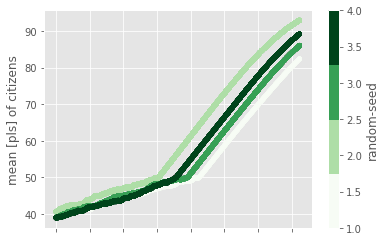

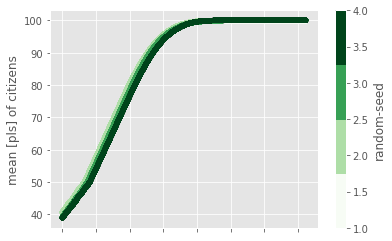

In [26]:
basecase.plot(kind= "scatter", x = "tick", y = "mean [pls] of citizens", c ="random-seed", cmap = plt.cm.get_cmap("Greens",4) );
experiment2.plot(kind= "scatter", x = "tick", y = "mean [pls] of citizens", c ="random-seed", cmap = plt.cm.get_cmap("Greens",4) );

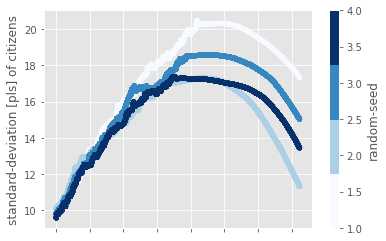

In [179]:
basecase.plot(kind= "scatter", x = "tick", y = "standard-deviation [pls] of citizens", c ="random-seed", cmap = plt.cm.get_cmap("Blues",4) );

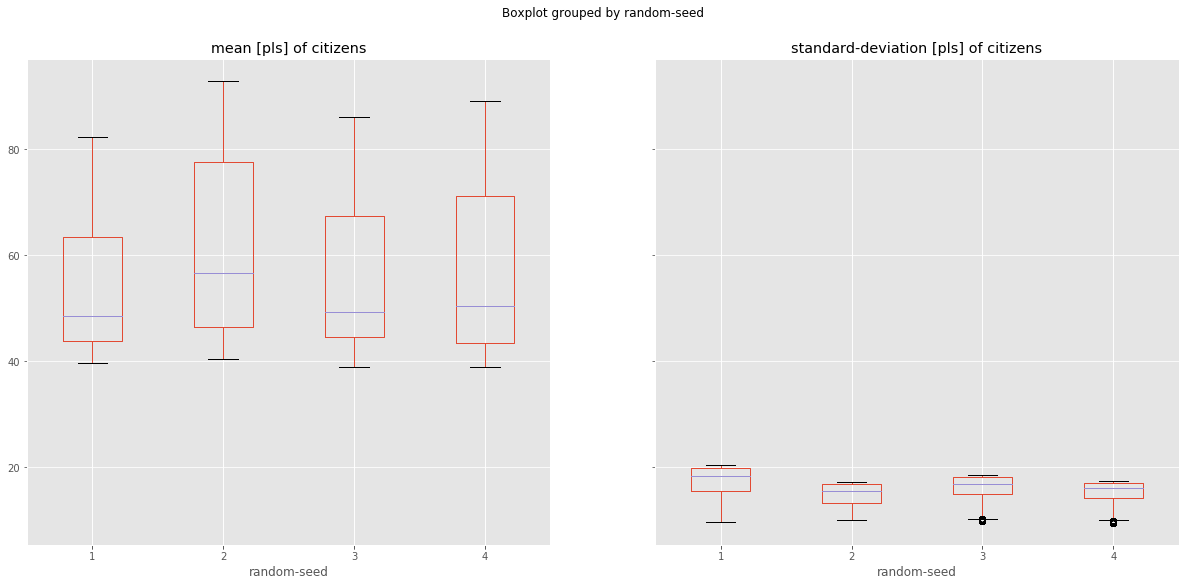

In [173]:
basecase.boxplot(column=["mean [pls] of citizens", "standard-deviation [pls] of citizens"], by="random-seed", figsize=(20,9));

In [10]:
# Each groups (mean and standard deviation) observations having the same of random seed represent specific populations of data (or sample of specific populations of data)
# for each of such sumples, we compute a numerical statistical summary.
# In this way we can compare distributions' statistical parameters across populations defined by the different random seeds
basecase_kpi = basecase.groupby("random-seed")[ ["mean [pls] of citizens", "standard-deviation [pls] of citizens"] ]
basecase_kpi.describe()

mean [pls] of citizens                                   \
                             count       mean        std        min   
random-seed                                                           
1                          36168.0  53.727742  12.675816  39.673346   
2                          36168.0  61.710576  17.063368  40.517594   
3                          36168.0  55.840714  14.163488  38.999809   
4                          36168.0  57.433539  15.860949  38.908268   

                                                         \
                   25%        50%        75%        max   
random-seed                                               
1            43.927719  48.546248  63.449465  82.403872   
2            46.555499  56.667963  77.655556  92.940035   
3            44.671432  49.423830  67.508415  86.071028   
4            43.537985  50.525358  71.300230  89.188141   

            standard-deviation [pls] of citizens                       \
                                           count       mean       std   
random-seed                                                             
1                                        36168.0  17.292801  3.036622   
2                                        36168.0  15.033821  2.044691   
3                                        36168.0  16.195984  2.428169   
4                                        36168.0  15.315238  2.086714   

                                                                    
                   min        25%        50%        75%        max  
random-seed                                                         
1             9.679433  15.470398  18.345222  19.845300  20.491506  
2            10.071334  13.380670  15.513447  16.959690  17.307588  
3             9.821924  15.031515  16.826394  18.250267  18.579188  
4             9.577127  14.216480  16.133631  17.008073  17.377699

In [9]:
# generate one single dataset for means having tick as the key column
basecase_seed1 = basecase.loc[(basecase["random-seed"] == 1) , ["tick", "mean [pls] of citizens"]]
basecase_seed2 = basecase.loc[(basecase["random-seed"] == 2) , ["tick", "mean [pls] of citizens"]]
basecase_seed3 = basecase.loc[(basecase["random-seed"] == 3) , ["tick", "mean [pls] of citizens"]]
basecase_seed4 = basecase.loc[(basecase["random-seed"] == 4) , ["tick", "mean [pls] of citizens"]]

basecase_means = pd.merge(basecase_seed1, basecase_seed2, on= "tick")
basecase_means = pd.merge(basecase_means, basecase_seed3, on= "tick")
basecase_means = pd.merge(basecase_means, basecase_seed4, on= "tick")
basecase_means.columns = ["tick","mean pls - seed 1", "mean pls - seed 2", "mean pls - seed 3", "mean pls - seed 4"]

# generate one single dataset for standard deviations having tick as the key column
basecase_seed1_stdev = basecase.loc[(basecase["random-seed"] == 1) , ["tick", "standard-deviation [pls] of citizens"]]
basecase_seed2_stdev = basecase.loc[(basecase["random-seed"] == 2) , ["tick", "standard-deviation [pls] of citizens"]]
basecase_seed3_stdev = basecase.loc[(basecase["random-seed"] == 3) , ["tick", "standard-deviation [pls] of citizens"]]
basecase_seed4_stdev = basecase.loc[(basecase["random-seed"] == 4) , ["tick", "standard-deviation [pls] of citizens"]]

basecase_stdevs = pd.merge(basecase_seed1_stdev, basecase_seed2_stdev, on= "tick")
basecase_stdevs = pd.merge(basecase_stdevs, basecase_seed3_stdev, on= "tick")
basecase_stdevs = pd.merge(basecase_stdevs, basecase_seed4_stdev, on= "tick")
basecase_stdevs.columns = ["tick","stdev pls - seed 1", "stdev pls - seed 2", "stdev pls - seed 3", "stdev pls - seed 4"]

In [11]:
basecase_means

,tick,mean pls - seed 1,mean pls - seed 2,mean pls - seed 3,mean pls - seed 4
0,0,39.828781,40.542336,38.999809,38.908268
1,1,39.831612,40.545137,39.002654,38.911120
2,2,39.834419,40.547985,39.005526,38.913962
3,3,39.837230,40.550818,39.008359,38.916790
4,4,39.840085,40.553651,39.011166,38.919636
...,...,...,...,...,...
36163,36163,82.394638,92.933062,86.062157,89.180491
36164,36164,82.396833,92.935018,86.063997,89.182501
36165,36165,82.399400,92.936370,86.066387,89.184282
36166,36166,82.401605,92.938359,86.068778,89.186097


In [133]:
basecase_stdevs

,tick,stdev pls - seed 1,stdev pls - seed 2,stdev pls - seed 3,stdev pls - seed 4
0,0,9.679508,10.071388,9.822304,9.577178
1,1,9.679486,10.071366,9.822325,9.577165
2,2,9.679481,10.071371,9.822312,9.577158
3,3,9.679488,10.071370,9.822251,9.577160
4,4,9.679524,10.071383,9.822264,9.577159
...,...,...,...,...,...
36163,36163,17.338460,11.307046,15.027810,13.448468
36164,36164,17.337763,11.306303,15.026821,13.447657
36165,36165,17.337542,11.305239,15.026297,13.446726
36166,36166,17.336829,11.304574,15.025601,13.445824


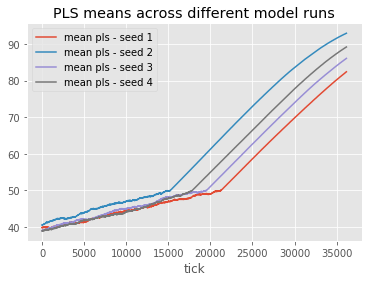

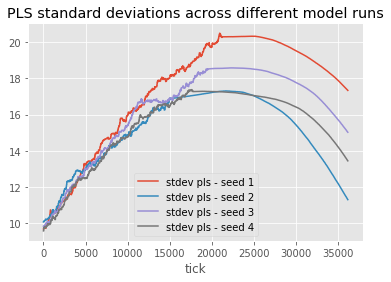

In [142]:
basecase_means.plot(kind= "line", x = "tick", title= "PLS means in the basecase runs"); 
basecase_stdev.plot(kind= "line", x = "tick",title= "PLS standard deviations across different model runs");

## Experiment 2: Increase Enforcements

In [6]:
# generate one single dataset for means having tick as the key column
experiment2_seed1 = experiment2.loc[(basecase["random-seed"] == 1) , ["tick", "mean [pls] of citizens"]]
experiment2_seed2 = experiment2.loc[(basecase["random-seed"] == 2) , ["tick", "mean [pls] of citizens"]]
experiment2_seed3 = experiment2.loc[(basecase["random-seed"] == 3) , ["tick", "mean [pls] of citizens"]]
experiment2_seed4 = experiment2.loc[(basecase["random-seed"] == 4) , ["tick", "mean [pls] of citizens"]]

experiment2_means = pd.merge(experiment2_seed1, experiment2_seed2, on= "tick")
experiment2_means = pd.merge(experiment2_means, experiment2_seed3, on= "tick")
experiment2_means = pd.merge(experiment2_means, experiment2_seed4, on= "tick")
experiment2_means.columns = ["tick","mean pls - seed 1", "mean pls - seed 2", "mean pls - seed 3", "mean pls - seed 4"]


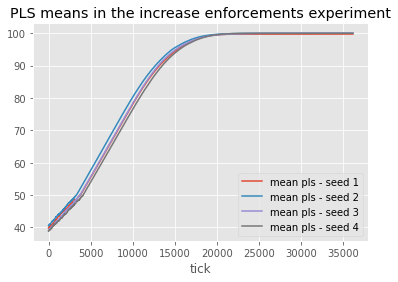

In [7]:
experiment2_means.plot(kind= "line", x = "tick", title= "PLS means in the increase enforcements experiment"); 

In [12]:
basecase_means

,tick,mean pls - seed 1,mean pls - seed 2,mean pls - seed 3,mean pls - seed 4
0,0,39.828781,40.542336,38.999809,38.908268
1,1,39.831612,40.545137,39.002654,38.911120
2,2,39.834419,40.547985,39.005526,38.913962
3,3,39.837230,40.550818,39.008359,38.916790
4,4,39.840085,40.553651,39.011166,38.919636
...,...,...,...,...,...
36163,36163,82.394638,92.933062,86.062157,89.180491
36164,36164,82.396833,92.935018,86.063997,89.182501
36165,36165,82.399400,92.936370,86.066387,89.184282
36166,36166,82.401605,92.938359,86.068778,89.186097


In [24]:
resolution = 45
ticks_1_year = 60 / resolution * 24 * 365
number_years = 3

base_case = basecase_means.iloc[int(number_years*ticks_1_year)]
base_case = base_case.drop("tick")
#base_case = [base_case["1_mean"], base_case["2_mean"], base_case["3_mean"],base_case["4_mean"]]

scenario_2 = experiment2_means.iloc[int(number_years*ticks_1_year)]
scenario_2 = scenario_2.drop("tick")

stats.ttest_ind(a=base_case,b=scenario_2,equal_var=False)

Ttest_indResult(statistic=-5.840836237152942, pvalue=0.009964942857315102)

In [20]:
base_case


mean pls - seed 1    39.828781
mean pls - seed 2    40.542336
mean pls - seed 3    38.999809
mean pls - seed 4    38.908268
Name: 0, dtype: float64